# Salary and Job Posting Correlation Analysis

## Objective
This notebook demonstrates **multi-variable analysis and correlation** including:
- Relationship analysis between salary and job volume
- Scatter plots and distribution comparisons
- Cross-variable aggregations
- Statistical correlation measurements
- Professional visualization of multi-dimensional data

These techniques help identify market dynamics where salary levels and hiring volume interact.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [3]:
df.pivot_table(values = 'salary_year_avg', index = 'job_country',
               columns = 'job_title_short', aggfunc = 'median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [4]:
top_countries = df['job_country'].value_counts().head(5).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany'], dtype='object', name='job_country')

In [5]:
df_job_country_salary = df.pivot_table(values= 'salary_year_avg',
               index= 'job_country',
               columns= 'job_title_short',
               aggfunc= 'median')
df_job_country_salary = df_job_country_salary.loc[top_countries]
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist' ]


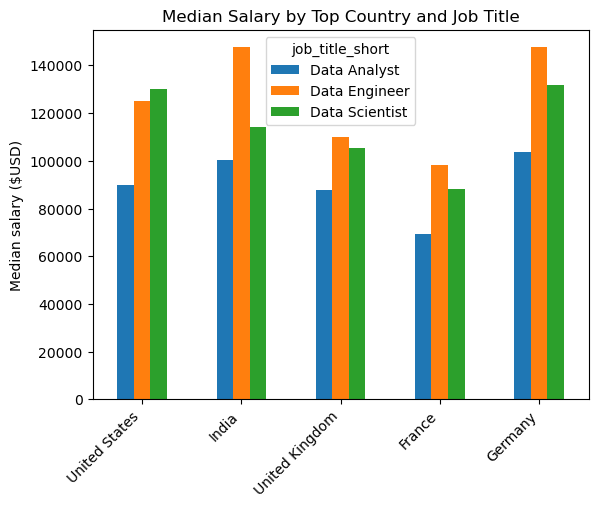

In [6]:
from sympy import rotations


df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary.plot(kind = 'bar')
plt.ylabel('Median salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Top Country and Job Title')
plt.xticks(rotation = 45, ha = 'right')
plt.show()
           

In [7]:
df_usa = df[df['job_country'] == 'United States']



In [8]:
median_pivot = df_usa.pivot_table(values='salary_year_avg',
                                   index = 'job_title_short',
                                   aggfunc=['median','min','max'])


In [9]:
median_pivot.sort_values(by = ('median', 'salary_year_avg'),
                         ascending= False)

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Senior Data Scientist,155000.0,55000.0,475000.0
Machine Learning Engineer,150000.0,44408.5,315000.0
Senior Data Engineer,150000.0,45000.0,375000.0
Data Scientist,130000.0,30000.0,960000.0
Software Engineer,130000.0,48982.0,375000.0
Data Engineer,125000.0,23496.0,525000.0
Cloud Engineer,116100.0,42000.0,221844.0
Senior Data Analyst,110000.0,35360.0,425000.0


In [10]:
median_pivot.sort_index(inplace = True)
median_pivot

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,90000.0,35000.0,387460.0
Cloud Engineer,116100.0,42000.0,221844.0
Data Analyst,90000.0,25000.0,375000.0
Data Engineer,125000.0,23496.0,525000.0
Data Scientist,130000.0,30000.0,960000.0
Machine Learning Engineer,150000.0,44408.5,315000.0
Senior Data Analyst,110000.0,35360.0,425000.0
Senior Data Engineer,150000.0,45000.0,375000.0


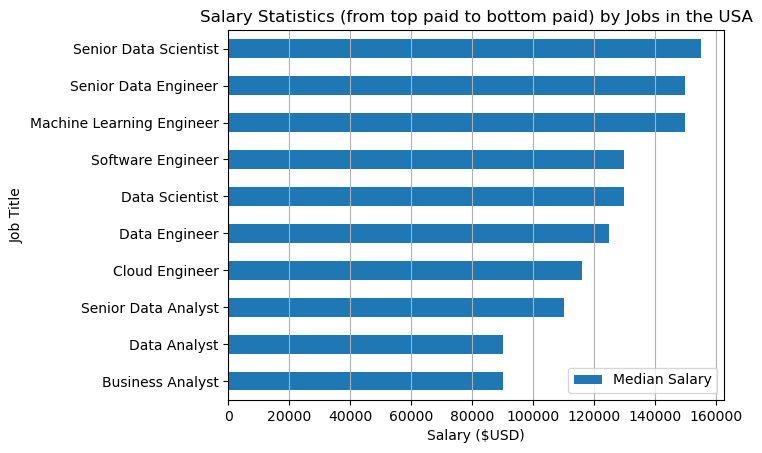

In [26]:
median_pivot['median'].sort_values(by = 'salary_year_avg',
                                   ascending= True).plot(kind = 'barh')
plt.grid(axis = 'x')
plt.xlabel('Salary ($USD)')
plt.ylabel('Job Title')
plt.legend(['Median Salary'])
plt.title('Salary Statistics (from top paid to bottom paid) by Jobs in the USA')
plt.show()


In [72]:
df_aze = df[df['job_country'] == 'Azerbaijan']
df_aze_copy = df_aze.copy()


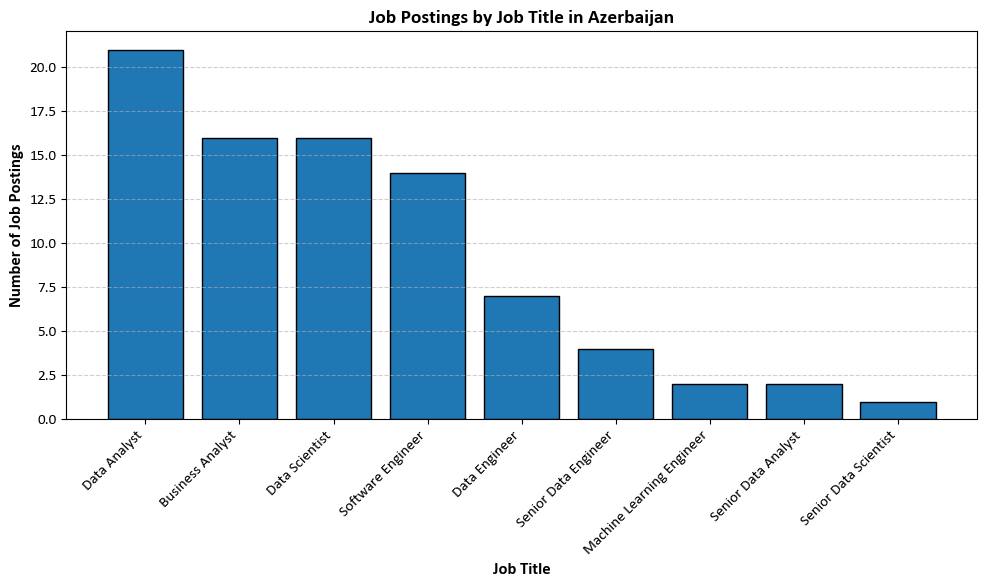

In [78]:
# Prepare counts for plotting
df_aze_jobs = df_aze_copy['job_title_short'].value_counts().sort_values(ascending = False)
# Use default style to avoid sketch/xkcd-like drawing
plt.style.use('default')
# Set professional fonts (falls back if not available)
plt.rcParams.update({'font.family': 'sans-serif', 'font.sans-serif': ['Calibri', 'DejaVu Sans'], 'font.size': 11})
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df_aze_jobs.index, df_aze_jobs.values, color='#1f77b4', edgecolor='black', linewidth=1)
ax.set_xlabel('Job Title', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Job Postings', fontsize=12, fontweight='bold')
ax.set_title('Job Postings by Job Title in Azerbaijan', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(df_aze_jobs)))
ax.set_xticklabels(df_aze_jobs.index, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
## Insights from Salary-Volume Analysis

Key findings from this analysis:
- **Salary vs. demand relationship**: How compensation correlates with job availability
- **Market efficiency signals**: Indicates roles where high pay compensates for scarcity
- **Career considerations**: Informs decisions about pursuing roles with different compensation/volume profiles

This analysis supports strategic career decisions based on market conditions.